In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h2o
from h2o.estimators import H2ORandomForestEstimator

training_filename = 'Datasets/NewTrainingCorpusNoMissing.csv'
testing_filename = 'Datasets/TestingCorpus.csv'

num_trees = 25
max_depth = 20
n_splits = 3
threshold = 0.5

In [3]:
tr_df = pd.read_csv(training_filename)
ts_df = pd.read_csv(testing_filename)

cols = list(tr_df.columns.values)

ytest = ts_df.values[:, len(cols) - 1]

In [4]:
h2o.init()
h2o.connect()

training = h2o.H2OFrame(tr_df)
test = h2o.H2OFrame(ts_df)

target_column = cols[-1]
training_columns = cols[:-1]

print(target_column)
print(training_columns)

model = H2ORandomForestEstimator(ntrees=num_trees, max_depth=max_depth, nfolds=n_splits)
model.train(x=training_columns, y=target_column, training_frame=training, validation_frame=test)
probabilities = model.predict(test)

probs_array = []
pred_array = []

probabilities = probabilities.as_data_frame().values.tolist()
for i in range(len(probabilities)):
    if probabilities[i][0] >= threshold:
        pred_array.append(1.0)
    else:
        pred_array.append(0.0)
    probs_array.append(probabilities[i][0])

Checking whether there is an H2O instance running at http://localhost:54321

.

.

.

.

.

 not found.

Attempting to start a local H2O server...

  Java Version: java version "1.8.0_40"; Java(TM) SE Runtime Environment (build 1.8.0_40-b27); Java HotSpot(TM) 64-Bit Server VM (build 25.40-b25, mixed mode)

  Starting server from /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar

  Ice root: /var/folders/z3/xy20bs3n5xz_pnkx07l70k0w0000gn/T/tmp_pq20660

  JVM stdout: /var/folders/z3/xy20bs3n5xz_pnkx07l70k0w0000gn/T/tmp_pq20660/h2o_Alonso_started_from_python.out

  JVM stderr: /var/folders/z3/xy20bs3n5xz_pnkx07l70k0w0000gn/T/tmp_pq20660/h2o_Alonso_started_from_python.err

  Server is running at http://127.0.0.1:54321

Connecting to H2O server at http://127.0.0.1:54321..

.

 successful.

H2O cluster uptime:,03 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,4 months and 3 days !!!
H2O cluster name:,H2O_from_python_Alonso_vfu6nl
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


Connecting to H2O server at http://localhost:54321..

.

 successful.

H2O cluster uptime:,04 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,4 months and 3 days !!!
H2O cluster name:,H2O_from_python_Alonso_vfu6nl
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Parse progress: |

█

█

█

█

█████████████████████████

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█| 100%

Parse progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

██████████████████████████| 100%

DELAYED

['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DEST_AIRPORT', 'DEPARTURE_TIME', 'FL_NUMBER', 'TAIL_NUMBER', 'ELAPSED_TIME', 'DAYS_TO_HOLIDAY', 'TEMPERATURE', 'SKY_CONTIDION', 'WIND_SPEED', 'PRESSURE', 'HUMIDITY', 'ALTIMETER', 'RAIN', 'SNOW', 'FOG', 'MIST', 'FREEZING']

drf Model Build progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

████████

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█| 100%

drf prediction progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

████| 100%

In [5]:
tp, fp, tn, fn = 0, 0, 0, 0
for x in range(len(ytest)):
    if ytest[x] == pred_array[x] == 1:
        tp += 1
for x in range(len(ytest)):
    if pred_array[x] == 1 and ytest[x] != pred_array[x]:
        fp += 1
for x in range(len(ytest)):
    if ytest[x] == pred_array[x] == 0:
        tn += 1
for x in range(len(ytest)):
    if pred_array[x] == 0 and ytest[x] != pred_array[x]:
        fn += 1

sensitivity = tp / (tp + fn)  # the fraction of positives that are correctly classified
specificity = tn / (tn + fp)  # the fraction of negatives that are correctly classified
precision = tp / (tp + fp)
error_rate = (fp + fn) / (fp + fn + tp + tn)
accuracy = 1.0 - error_rate
f_score = (2 * precision * sensitivity) / (precision + sensitivity)
print("TP: {0}, FP: {1}, TN: {2}, FN: {3}".format(tp, fp, tn, fn))
print("Sensitivity or Recall: {0}%".format(sensitivity * 100.00))
print("Specificity: {0}%".format(specificity * 100.00))
print("Precision: {0}%".format(precision * 100.00))
print("Error rate: {0}%".format(error_rate * 100.00))
print("Accuracy: {0}%".format(accuracy * 100.00))
print("F1 Score: {0}%".format(f_score))

TP: 37257, FP: 18604, TN: 342971, FN: 60747

Sensitivity or Recall: 38.0157952736623%

Specificity: 94.85473276636935%

Precision: 66.69590590931061%

Error rate: 17.26601955267756%

Accuracy: 82.73398044732244%

F1 Score: 0.4842816754947518%

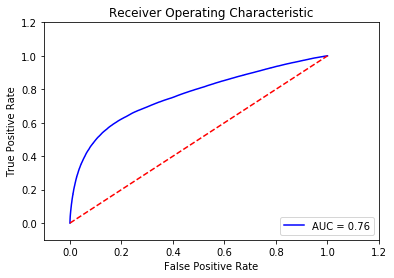

In [6]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, probs_array)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
         label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()